In [66]:
import numpy as mp
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score


In [67]:
df = pd.read_csv('/content/iris.csv')

In [68]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [69]:
df.rename(columns = {'sepal.length': 'sepal_length',
                     'sepal.width':'sepal_width',
                     'petal.length':'petal_length',
                     'petal.width':'petal_width'}, inplace = True )

In [70]:
y = df['variety']
X = df.drop('variety',axis=1)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = KNeighborsClassifier(n_neighbors=3)
dt.fit(X_train,y_train)
print("What is the Testing Accuracy")
print(dt.score(X_test,y_test))
print("What is the Training Accuracy")
print(dt.score(X_train,y_train))

What is the Testing Accuracy
1.0
What is the Training Accuracy
0.95


In [72]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# scaledXtrain = sc.fit_transform(X_train)
# scaledXtest = sc.transform(X_test)
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(scaledXtrain,y_train)
# print("Training Accuracy")
# print(knn.score(scaledXtrain,y_train))
# print("Testing Accuracy")
# print(knn.score(scaledXtest,y_test))

In [73]:
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("sc",StandardScaler()),  
("knn",KNeighborsClassifier(n_neighbors=5)) ,    
))
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))

Training Accuracy
0.9583333333333334
Testing Accuracy
0.9666666666666667


In [74]:
predicted = pipe.predict(X_test) # pipe
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



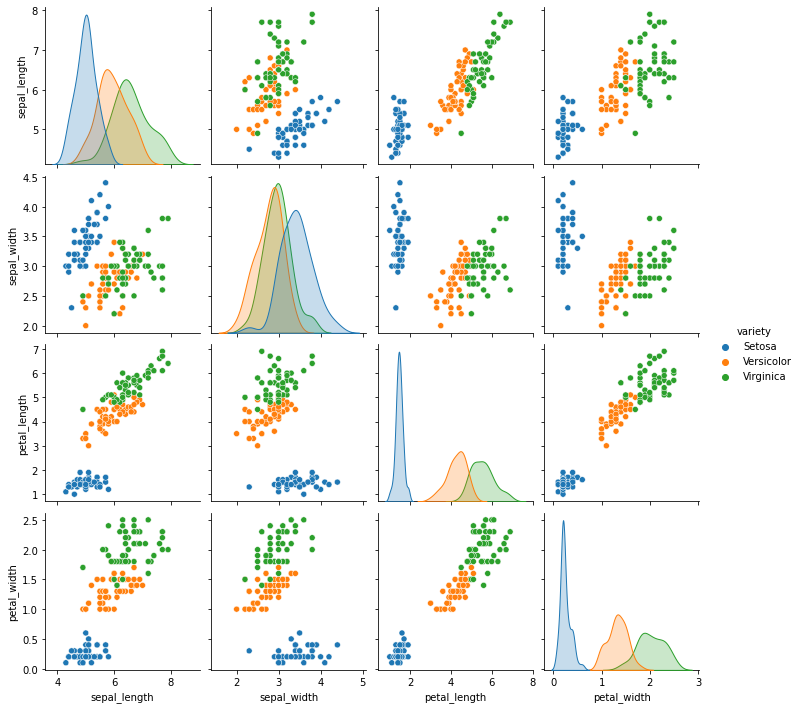

In [75]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='variety')

In [76]:
#To create .pkl file for prod data use.
import joblib
joblib.dump(pipe,'Knn_model.pkl') #predicted

['Knn_model.pkl']

In [77]:
Knn_clf = joblib.load('Knn_model.pkl')

In [78]:
Knn_clf.predict(data)